# Shortest Job First Scheduling Algorithm Nonpreemtive
### by Isabel Joy Adriatico, Tricia Jonina Alcisto

##### Input: Collects the number of processes and their arrival_time and burst_time.
##### SJF Calculation: Calls calculate_sjf_non_preemptive to execute the scheduling.
##### Display: Shows the Gantt chart and process summary.
##### Average Waiting Time: Calculates and prints the average waiting time.

This algorithm dynamically selects the shortest job ready at the current time.
It optimizes the average waiting time by executing shorter tasks first, as long as they have arrived.
Processes are selected based on the shortest burst time from the ready queue (processes that have arrived by the current time).
If no process is ready, the CPU idles until the next process arrives.

In [10]:
import matplotlib.pyplot as plt

#### Process
##### Purpose: This Process class defines the attributes for each process. 

In [11]:
class Process:
    def __init__(self, pid, arrival_time, burst_time):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.completion_time = 0
        self.turnaround_time = 0
        self.waiting_time = 0

#### calculate_sjf_non_preemptive
##### Purpose: Implements the SJF non-preemptive scheduling.

In [12]:
def calculate_sjf_non_preemptive(processes):
    processes.sort(key=lambda x: x.arrival_time)  # Sort by arrival time initially
    current_time = 0
    completed_processes = []
    
    while processes:
        # Filter ready processes based on arrival time
        ready_queue = [p for p in processes if p.arrival_time <= current_time]
        
        if not ready_queue:
            # If no process is ready, jump to the next arrival time
            current_time = min(processes, key=lambda x: x.arrival_time).arrival_time
            ready_queue = [p for p in processes if p.arrival_time <= current_time]
        
        # Select the process with the shortest burst time
        shortest_job = min(ready_queue, key=lambda x: x.burst_time)
        
        # Set the start time and update current time
        shortest_job.start_time = current_time
        current_time = max(current_time, shortest_job.arrival_time) + shortest_job.burst_time
        
        # Calculate completion time and turnaround time
        shortest_job.completion_time = current_time
        shortest_job.turnaround_time = shortest_job.completion_time - shortest_job.arrival_time
        
        # Calculate waiting time using Start Time - Arrival Time
        shortest_job.waiting_time = shortest_job.start_time - shortest_job.arrival_time
        
        # Add the completed job to the list
        completed_processes.append(shortest_job)
        processes.remove(shortest_job)
    
    return completed_processes

### Gantt chart, process summary, and average waiting time are displayed.

Enter the number of processes:  5
Enter arrival time for process A:  0
Enter burst time for process A:  8
Enter arrival time for process B:  3
Enter burst time for process B:  4
Enter arrival time for process C:  4
Enter burst time for process C:  5
Enter arrival time for process D:  6
Enter burst time for process D:  3
Enter arrival time for process E:  10
Enter burst time for process E:  2


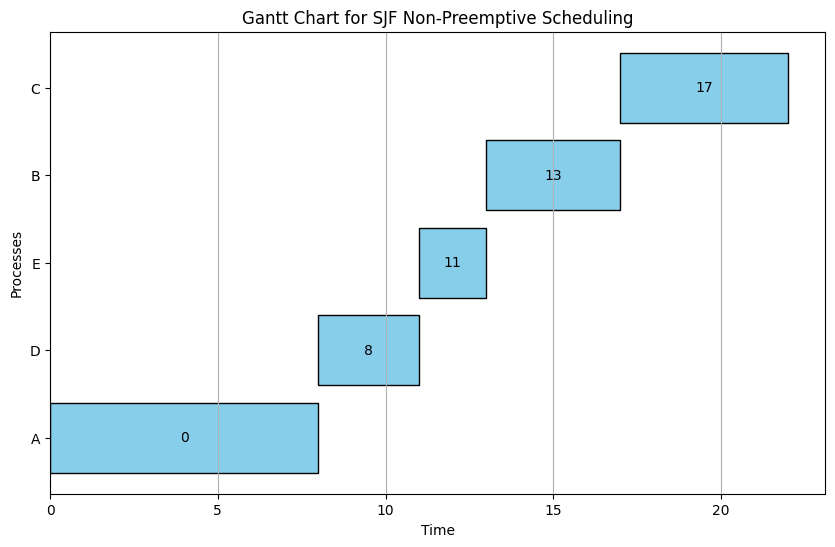


Process Summary:
Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
A	0		8		8		8		0
D	6		3		11		5		2
E	10		2		13		3		1
B	3		4		17		14		10
C	4		5		22		18		13

Average Waiting Time: 5.20 ms


In [13]:
def display_gantt_chart(processes):
    start_times = []
    process_names = []
    for process in processes:
        start_times.append(process.start_time)
        process_names.append(process.pid)
    
    plt.figure(figsize=(10, 6))
    plt.barh(process_names, [p.burst_time for p in processes], left=start_times, color='skyblue', edgecolor='black')
    plt.xlabel("Time")
    plt.ylabel("Processes")
    plt.title("Gantt Chart for SJF Non-Preemptive Scheduling")
    plt.grid(axis='x')
    
    for i, process in enumerate(processes):
        plt.text(start_times[i] + process.burst_time / 2, i, str(start_times[i]), ha='center', va='center', color='black')
    
    plt.show()

def print_process_summary(processes):
    print("\nProcess Summary:")
    print("Process\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")
    for process in processes:
        print(f"{process.pid}\t{process.arrival_time}\t\t{process.burst_time}\t\t{process.completion_time}\t\t{process.turnaround_time}\t\t{process.waiting_time}")

def calculate_average_waiting_time(processes):
    total_waiting_time = sum(process.waiting_time for process in processes)
    average_waiting_time = total_waiting_time / len(processes)
    return average_waiting_time

def main():
    processes = []
    n = int(input("Enter the number of processes: "))
    
    for i in range(n):
        pid = chr(65 + i)  # Process IDs as A, B, C, ...
        arrival_time = int(input(f"Enter arrival time for process {pid}: "))
        burst_time = int(input(f"Enter burst time for process {pid}: "))
        processes.append(Process(pid, arrival_time, burst_time))

    completed_processes = calculate_sjf_non_preemptive(processes)
    display_gantt_chart(completed_processes)
    print_process_summary(completed_processes)

    avg_waiting_time = calculate_average_waiting_time(completed_processes)
    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")

if __name__ == "__main__":
    main()